# Overview
This notebook explores what makes content go viral using real-world data from my channel (`faroun`) and competitors.  
The analysis follows an iterative process, where each step informs the next:  

1. **Data Collection / Loading:** Load channel data, transcripts, and engagement metrics collected beforehand.  
2. **Exploratory Data Analysis (EDA):** Understand the distributions, trends, and relationships in the data.  
3. **Data Cleaning / Preprocessing:** Fix missing values, standardize formats, and prepare features.  
4. **Modeling:** Build predictive models for labeling.  
5. **Iteration:** Re-explore the data and refine models based on insights, charts, and patterns discovered.


In [3]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

## 1. Collecting the data: 


In [4]:
awalf_data = pd.read_csv("../data/niche_data/awalefofficial_transcription.csv")
faroun_data = pd.read_csv("../data/niche_data/Faroun_cats_transcription.csv")
PetSmmile_data = pd.read_csv("../data/niche_data/Smiling-Pet_transcription.csv")


##  Initial EDA
We start with a general overview of the raw dataset to understand its structure, types and basic statistics.

In [1]:
def eda_data_niche(data):
    print("Data set Info")
    display(data.head())
    print("------------------------------------")
    print("\n Descbtion of the data")
    display(data.describe())
    print("------------------------------------")
    print("data info")
    display(data.info())




### 2.1. petsmile eda

In [5]:
eda_data_niche(PetSmmile_data)


Data set Info


,video_id,title,view_count,duration,upload_date,transcript
0,VpY4EOW9H2s,كيف تعرف أن قطتك تحاول الاعتذار منك؟ 😿❤️,55164,19,20250529,كيف تعرف ان قطتك تحاول الاعتذار منك؟ اولا تجلس...
1,-iIWNCTQ5Z8,أكثر المشكلات الصحية شيوعًا في القطط 🙀,10540,49,20250528,لديك اربع من اكثر المشكلات الصحيه شيوعا في الق...
2,xJj_1AQyIzQ,لماذا تعود القطط إلى أصحابها حتى بعد فقدانها؟ 🏠🐾,29497,23,20250527,لماذا تعود القطط الى اصحابها حتى بعد فقدانها؟ ...
3,hi3WhH9wrWI,هل القطط تتذكر أصحابها بعد غياب طويل؟ ⏳🐈,21589,23,20250526,هل تتذكرك قطك بعد غياب طويل؟ اولا: القطط تملك ...
4,10aKcHsoDHc,إذا فعلت قطتك هذا، فهي تحبك بجنون! ❤️🐾,35504,17,20250525,هل قطتك تحبك بجنون؟ اولا تنام على صدرك او بجان...


------------------------------------

 Descbtion of the data


,view_count,duration,upload_date
count,5.990000e+02,599.000000,5.990000e+02
mean,8.103363e+04,33.415693,2.024171e+07
std,2.618311e+05,8.615485,5.925964e+03
min,3.183000e+03,17.000000,2.023101e+07
25%,2.051300e+04,28.000000,2.024030e+07
50%,3.341500e+04,31.000000,2.024080e+07
75%,5.103000e+04,36.000000,2.024123e+07
max,3.774698e+06,60.000000,2.025053e+07


------------------------------------
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     599 non-null    object
 1   title        599 non-null    object
 2   view_count   599 non-null    int64 
 3   duration     599 non-null    int64 
 4   upload_date  599 non-null    int64 
 5   transcript   599 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


None

### 2.2. faroun eda

In [ ]:
eda_data_niche(faroun_data)


Index(['video_id', 'title', 'view_count', 'duration', 'upload_date',
       'transcript'],
      dtype='object')
Data set Info


,video_id,title,view_count,duration,upload_date,transcript
0,R5nAKgFtJ3E,صاحب القطط اشترى لهم بيتًا باردًا ضخمًا.. لكن ...,409173,58,20250918,اشترى هذا المالك بيتا باردا وضخما لقططه فقد كا...
1,HgzvVQpo7EA,القطط لم تعرف ماذا تفعل #القطط #قطط,5350002,38,20250908,اشترى هذا المالك سريرا ضخما لقططه عندما وضع ال...
2,HYKJlMy9aVE,القط المنسي دائمًا 🐱😢 #القطط #قطط,247443,58,20250830,كان هذا القط المسكين يهمل ويترك وحيدا بينما ين...
3,dqD_octxixg,المالك الذي يحول فراء قططه لاختراعات.. لكن ال...,1052715,64,20250826,ابتكر هذا المالك فكره غريبه لاستخدام فراء قططه...
4,jiO-8bfU7ow,القطة المنبوذة التي تحولت إلى تميمة حظ لا تُصد...,8462687,68,20250822,كانت هذه القطط الصغيره منبوذه من قبل اقرانها ب...


------------------------------------

 Descbtion of the data


,view_count,duration,upload_date
count,8.000000e+01,80.00000,8.000000e+01
mean,5.812141e+05,50.43750,2.025021e+07
std,1.440153e+06,8.02503,1.471335e+03
min,3.047500e+04,31.00000,2.024120e+07
25%,9.576675e+04,43.75000,2.025022e+07
50%,1.828875e+05,50.50000,2.025033e+07
75%,3.516412e+05,56.25000,2.025070e+07
max,8.462687e+06,68.00000,2.025092e+07


------------------------------------
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     80 non-null     object
 1   title        80 non-null     object
 2   view_count   80 non-null     int64 
 3   duration     80 non-null     int64 
 4   upload_date  80 non-null     int64 
 5   transcript   80 non-null     object
dtypes: int64(3), object(3)
memory usage: 3.9+ KB


None

### 2.3. awalf eda

In [6]:
eda_data_niche(awalf_data)

Data set Info


,video_id,title,view_count,duration,upload_date,transcript
0,3UfdivMh7gs,ماذا يقول لك قطك في الشتاء؟ 🐈🥺,6286581,51,20241126,هل تعلم ان قطك الصغير يريد ان يقول لك هذه الكل...
1,vaC8ULZNNNA,أشياء منزلية تعشقها القطط بجنون 😍🐈 #قطط,3758533,39,20241124,اشياء منزليه غريبه تحبها القطط بجنون واحد قشور...
2,sqH0tjhKSLQ,هل يشعر قطك بالوحدة عند غيابك؟ 🐈‍⬛💙,10561705,42,20241030,هل يشعر قطك بالوحده عندما لا تكون في المنزل في...
3,SDgrsUiRmz0,قط من ذوي الهمم سيأسر قلبك 🥺💙,2401465,22,20241029,هذا القط لا يملك ارجلا خلفيه لان الاطباء اضطرو...
4,eXSL8kBvPvc,علامات أن قطك يعتبرك أمه 🥺💙,2981766,54,20241028,هل تعلم ان قطك يعتبرك امه اذا كان يقوم بهذه ال...


------------------------------------

 Descbtion of the data


,view_count,duration,upload_date
count,8.600000e+01,86.000000,8.600000e+01
mean,1.733601e+06,52.151163,2.023976e+07
std,2.069053e+06,8.394000,3.060809e+03
min,3.196400e+04,22.000000,2.023072e+07
25%,4.828612e+05,48.000000,2.024071e+07
50%,1.076405e+06,54.000000,2.024081e+07
75%,2.227995e+06,59.000000,2.024091e+07
max,1.063800e+07,60.000000,2.024113e+07


------------------------------------
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     86 non-null     object
 1   title        86 non-null     object
 2   view_count   86 non-null     int64 
 3   duration     86 non-null     int64 
 4   upload_date  86 non-null     int64 
 5   transcript   86 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.2+ KB


None

## Step 3: Data Cleaning
After the initial EDA, we identified some columns and formatting issues that need cleaning:

- **Remove `video_id`**: This column is not needed for our analysis.  
- **Convert `upload_date` to datetime**: Change from string/int format to a proper date format for easier analysis.  
- **Remove duplicates**: Ensure there are no repeated rows in the dataset.  

The cleaning function below applies these steps to each dataset:


In [ ]:

def data_youtube_cleaning(data):
    data.drop('video_id' ,axis = 1 , inplace = True)
    data['upload_date'] = pd.to_datetime(data['upload_date'] , format='%Y%m%d') 
    data = data.drop_duplicates()
    return data
faroun_data = data_youtube_cleaning(faroun_data)
awalf_data = data_youtube_cleaning(awalf_data)
PetSmmile_data = data_youtube_cleaning(PetSmmile_data)

In [10]:
## verifying changes 
eda_data_niche(faroun_data)

Data set Info


,title,view_count,duration,upload_date,transcript
0,صاحب القطط اشترى لهم بيتًا باردًا ضخمًا.. لكن ...,409173,58,2025-09-18,اشترى هذا المالك بيتا باردا وضخما لقططه فقد كا...
1,القطط لم تعرف ماذا تفعل #القطط #قطط,5350002,38,2025-09-08,اشترى هذا المالك سريرا ضخما لقططه عندما وضع ال...
2,القط المنسي دائمًا 🐱😢 #القطط #قطط,247443,58,2025-08-30,كان هذا القط المسكين يهمل ويترك وحيدا بينما ين...
3,المالك الذي يحول فراء قططه لاختراعات.. لكن ال...,1052715,64,2025-08-26,ابتكر هذا المالك فكره غريبه لاستخدام فراء قططه...
4,القطة المنبوذة التي تحولت إلى تميمة حظ لا تُصد...,8462687,68,2025-08-22,كانت هذه القطط الصغيره منبوذه من قبل اقرانها ب...


------------------------------------

 Descbtion of the data


,view_count,duration,upload_date
count,8.000000e+01,80.00000,80
mean,5.812141e+05,50.43750,2025-04-20 15:54:00
min,3.047500e+04,31.00000,2024-12-01 00:00:00
25%,9.576675e+04,43.75000,2025-02-17 12:00:00
50%,1.828875e+05,50.50000,2025-03-27 00:00:00
75%,3.516412e+05,56.25000,2025-07-04 00:00:00
max,8.462687e+06,68.00000,2025-09-18 00:00:00
std,1.440153e+06,8.02503,NaN


------------------------------------
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        80 non-null     object        
 1   view_count   80 non-null     int64         
 2   duration     80 non-null     int64         
 3   upload_date  80 non-null     datetime64[ns]
 4   transcript   80 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.2+ KB


None

## Step 3: Focused EDA after Cleaning
After cleaning the data, we explore specific insights, such as the top 5 performing videos by views for each dataset.  
This helps us understand trends and patterns in content performance.

c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11035 (\N{BLACK LARGE SQUARE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128008 (\N{CAT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


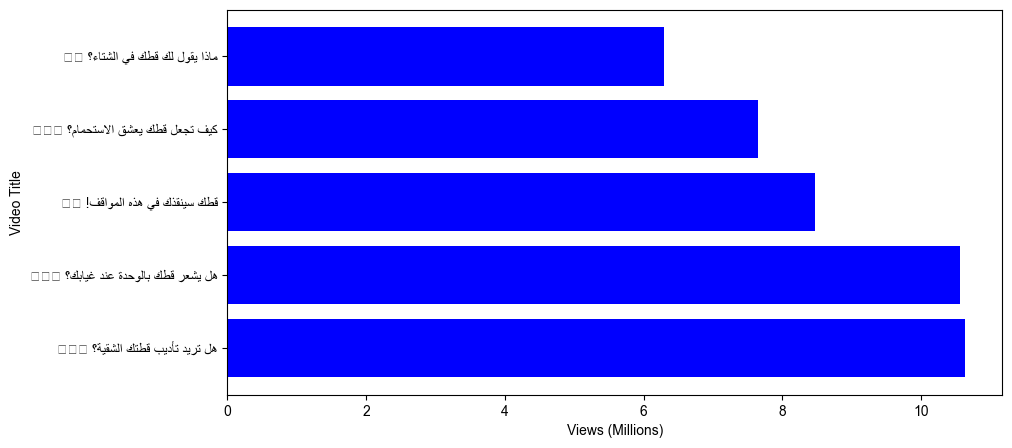

c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128049 (\N{CAT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 

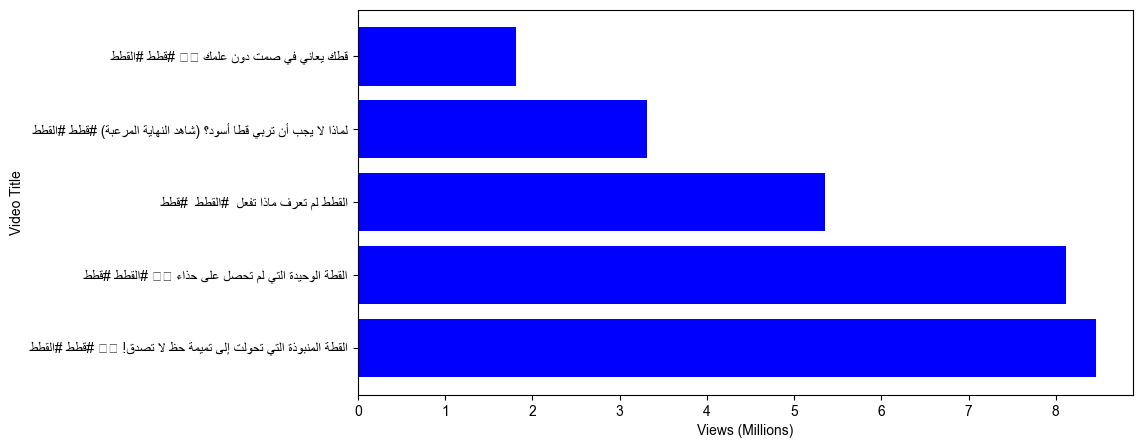

c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128571 (\N{SMILING CAT FACE WITH HEART-SHAPED EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128570 (\N{SMILING CAT FACE WITH OPEN MOUTH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128568 (\N{GRINNING CAT FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


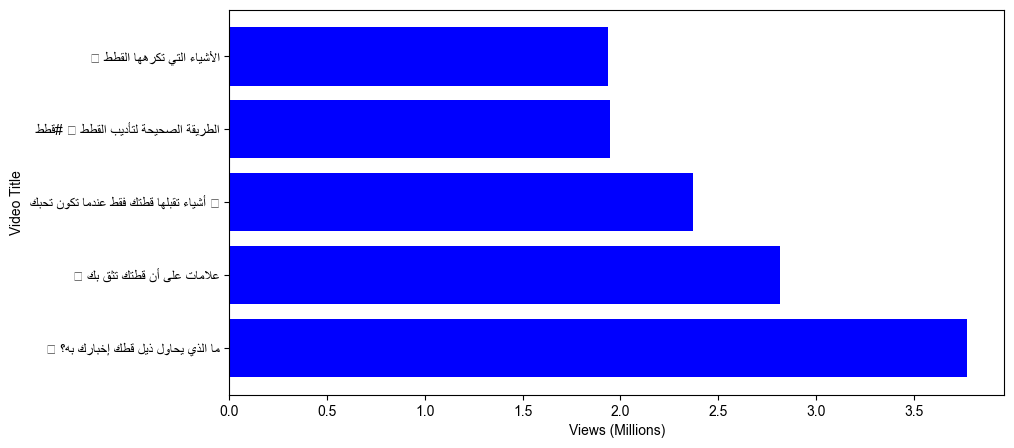

In [11]:
import arabic_reshaper
from bidi.algorithm import get_display
def top_5_videos_performance(data):
    data = data.nlargest(5 , 'view_count')
    data_views = data['view_count']/1000000
    plt.figure(figsize=(10,5))
    plt.rcParams['font.family'] = 'Arial'
    video_titles_rtl = [get_display(arabic_reshaper.reshape(title)) for title in data['title']]

    plt.barh(video_titles_rtl ,data_views , color='blue')
    plt.ylabel('Video Title')
    plt.xlabel('Views (Millions)')
    plt.show()

top_5_videos_performance(awalf_data)
top_5_videos_performance(faroun_data)
top_5_videos_performance(PetSmmile_data)


## Insights / Observations
After the focused EDA, we can make the following observations:  

- The top 5 videos for each channel range from 2 million to 10 million views, indicating that this niche has a sizable audience.  
- Awalf’s top 5 videos have the highest view counts among the channels, suggesting strong engagement or better content strategy.  
- Hashtags do not appear to be essential for virality, as most videos in the top 5 do not contain any.  
---


## Total Views per Channel
Next, we calculate the total views for each channel to get a sense of overall performance in the niche.

**Steps:**
1. Sum the `view_count` for each channel and convert to millions for easier readability.  
2. Store the results in a DataFrame for plotting.  
3. Plot a bar chart to compare total views across channels.

This helps us quickly identify which channel has the largest audience and overall engagement.


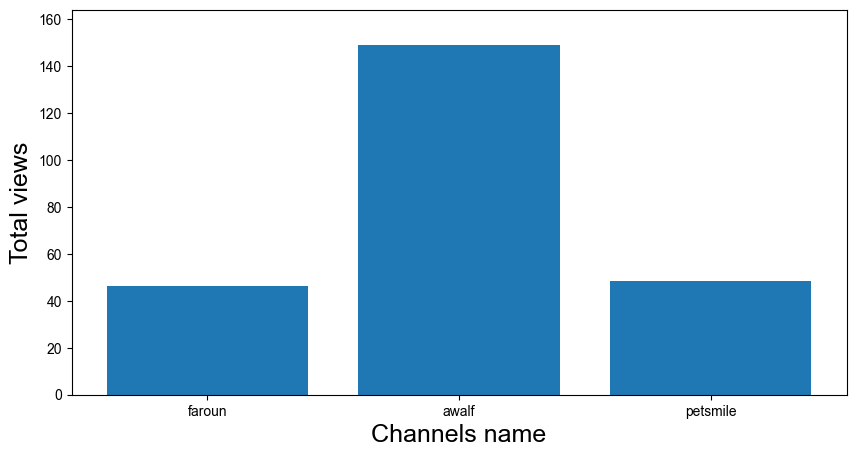

In [13]:


creators_channels_total_views_list = [ {'name' : 'faroun' , 'total_views' : f"{(faroun_data['view_count']/1000000).sum()}" }
                             ,{'name' : 'awalf' , 'total_views' : f"{(awalf_data['view_count']/1000000).sum()}" }
                             , {'name' : 'petsmile' , 'total_views' : f"{(PetSmmile_data['view_count']/1000000).sum()}" }]
creators_channels_total_views = pd.DataFrame(creators_channels_total_views_list)
creators_channels_total_views['total_views'] = creators_channels_total_views['total_views'].astype(float)
plt.figure(figsize=(10,5))
plt.bar(creators_channels_total_views['name'] , creators_channels_total_views['total_views'])
plt.xlabel('Channels name' , fontsize = 18 , color ='black')
plt.ylabel('Total views' , fontsize = 18 , color ='black')
plt.ylim(0, creators_channels_total_views['total_views'].max() * 1.1)
plt.show()



From the chart, we can see that Awalf has the highest total views, followed by Faroun and PetSmile, indicating stronger audience reach or content strategy.

---

## Average Views per Video
To understand the typical performance of videos on each channel, we calculate the **average views per video**.

**Steps:**
1. Compute the mean of `view_count` for each channel, converted to millions for readability.  
2. Store the results in a DataFrame.  
3. Plot a bar chart to visually compare average views across channels.

This analysis helps us identify which channel consistently performs better on a per-video basis, independent of the total number of videos uploaded.


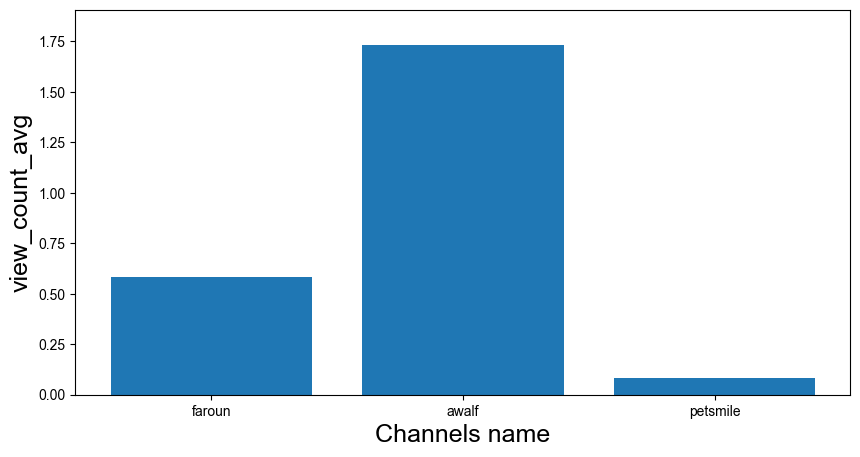

In [31]:
def creators_chart_comparasion(metric):
    creators_channels_avg_list = [ 
                            {'name' : 'faroun' , 'metric_avg' : f"{(faroun_data[metric]).mean()/1000000}" }
                             ,{'name' : 'awalf' , 'metric_avg' : f"{(awalf_data[metric]).mean()/1000000}" }
                             , {'name' : 'petsmile' , 'metric_avg' : f"{(PetSmmile_data[metric]/1000000).mean()}" }]
    creators_channels_avg = pd.DataFrame(creators_channels_avg_list)
    creators_channels_avg['metric_avg'] = creators_channels_avg['metric_avg'].astype(float)
    plt.figure(figsize=(10,5))
    plt.bar(creators_channels_avg['name'] , creators_channels_avg['metric_avg'])
    plt.xlabel('Channels name' , fontsize = 18 , color ='black')
    plt.ylabel(f'{metric}_avg' , fontsize = 18 , color ='black')
    plt.ylim(0, creators_channels_avg['metric_avg'].max() * 1.1)
    plt.show()
creators_chart_comparasion('view_count')

### insights
The results show a dramatic difference in performance, highlighting that one channel's content strategy is significantly more effective than the others on a consistent basis.

---


## Average Duration for viral and un-viral videos :


In [53]:
awalf_data['Creator'] = 'awalf'
faroun_data['Creator'] = 'faroun'
PetSmmile_data['Creator'] = 'petsmile'

all_data = pd.concat([awalf_data  , faroun_data , PetSmmile_data] , ignore_index=True)

def viralty_duration_1( data ):
    data['category'] = data['view_count'].apply(lambda x: 'Viral' if x > 1000000 else 'Unviral')

    sns.boxplot(x = 'Creator' ,  y ='duration' , hue='category' , data = data )
    plt.title(f' : Video Duration: Viral vs Unviral')
    plt.show()

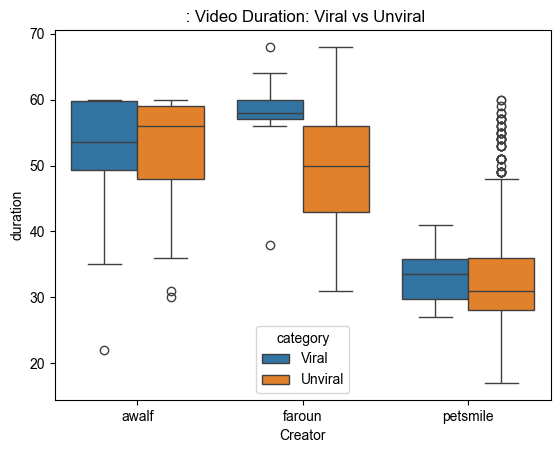

In [54]:
viralty_duration_1(all_data)

### insights :
- `faroun` most viral videos  are almost exclusively clustered between 57 and 60 seconds.
- `awalf` viral videos (blue box) have a median duration of around 53-54 seconds, with a very tight range (most videos are between 50 and 60 seconds). Their unviral videos (orange box) are also long but have a slightly lower median and a wider spread.
- `PetSmile` strategy is focused on shorter content, but this chart suggests that this strategy is less effective for achieving high-level virality. Unlike the other channels, a specific duration does not seem to be a factor in their success.

### Interpretation for My Channel ("Faroun")
*   **My Viral Sweet Spot:** For my channel, **Faroun**, there is a dramatic difference. My viral videos (blue box) are almost exclusively clustered between 57 and 60 seconds.
*   **The Cost of Inconsistency:** In contrast, my unviral content (orange box) is spread across a much wider range of durations. This strongly suggests that when I deviate from the ~60-second format, my videos are far less likely to succeed.

**Action Item:** The data is clear. To improve my channel's performance, I need to consistently produce videos that are between 50 and 60 seconds long. The next question is what kind of *content* should fill that time.

---

## 5. Content Style Analysis: Is Storytelling the Key to Virality?

We've established that longer videos (50-60 seconds) are a key ingredient for success. Now, we need to understand what kind of *content* should fill that time. This leads to our central hypothesis for this section.

#### Hypothesis
1.  **Script Style Matters:** The style of the video's transcript (the caption) is a key driver of virality.
2.  **Emotional and Story-driven content is more viral** than purely fact-based content.

To test this, we need to categorize each video's transcript and then see if there's a correlation between category and virality.

#### Tools
*   **Gemini API:** For programmatically labeling a sample of our video transcripts into categories.
*   **Scikit-learn:** For building a classification model to understand the patterns in the data.

##### Labeling samples of data using Gemini


In [57]:
import vertexai
from vertexai.generative_models import GenerativeModel
import os 
from dotenv import load_dotenv

load_dotenv()
all_data_labeled = all_data
if os.path.exists('all_data_labeled.csv'): 
    all_data_labeled = pd.read_csv("all_data_labeled.csv")

else:
    SERVICE_ACCOUNT_KEY_FILE = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
    PROJECT_ID = os.getenv("PROJECT_ID")
    LOCATION = os.getenv("LOCATION")

    vertexai.init(project=PROJECT_ID, location=LOCATION)
    captions = [caption for caption in all_data_labeled['transcript']]

    for idx , row in all_data_labeled.iterrows():
        caption = row['transcript']  
        model = GenerativeModel("gemini-2.5-flash")
        
        prompt=f"""Act as a script categorizer. Categorize the following script as **Story**, **Emotional**, or **Fact-based**.  
        Return **only the category, one word, nothing else**.  
                Script: "{caption}"
                """
        response = model.generate_content([prompt])

        print(caption)
        print(response.text)
        all_data_labeled.loc[ idx , 'transcript_category'] = response.text.strip()
    all_data_labeled.to_csv("all_data_labeled.csv" , index=False)


In [58]:
print(all_data_labeled['transcript_category'].value_counts())

transcript_category
Fact-based    713
Emotional      35
Story          17
Name: count, dtype: int64


### Insights :
Most of content in this niche (cat) is fact-based 

---

### Transcript Category for each channel

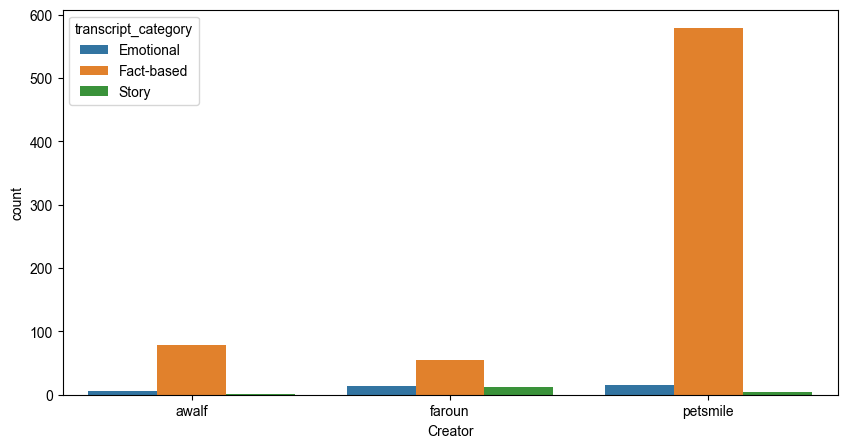

In [60]:
def creators_category_transcirpt(data):
    plt.figure(figsize=(10,5))
    sns.countplot(data = data , x='Creator' , hue='transcript_category')
    plt.show()
creators_category_transcirpt(all_data_labeled)

### Analysis: A Tale of Three Content Strategies

This chart breaks down the content strategy of each creator by showing the volume of videos they produce in each category (Emotional, Fact-based, Story). This visualization reveals that the creators are not just getting different results; they are playing entirely different games.

**Key Findings:**
*   **Fact-based content dominates the niche**, but the *mix* of content styles varies significantly between channels.
*   The two top-performing channels, **Awalf and Faroun**, produce a more diverse range of content, incorporating Emotional and Story-based videos.
*   **PetSmile** employs a high-volume strategy focused almost exclusively on Fact-based content.


---

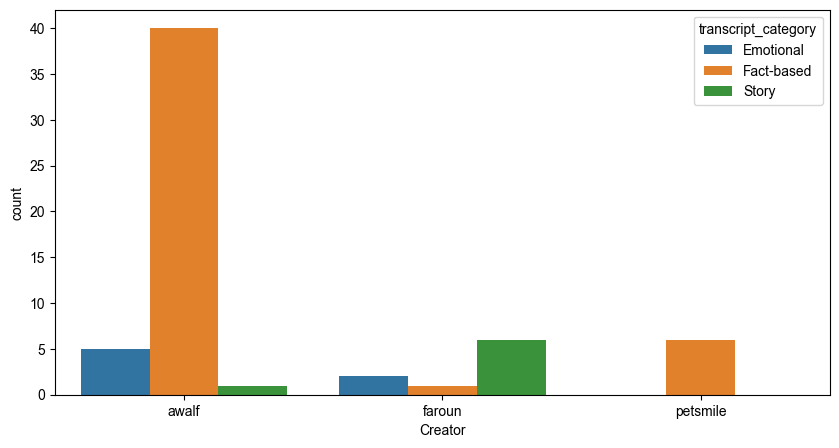

In [44]:
def creators_category_transcirpt_viral(data):
    plt.figure(figsize=(10,5))
    viral_data = data[data['is_viral'] == True]
    sns.countplot(data = viral_data , x='Creator' , hue='transcript_category' )
    plt.show()
creators_category_transcirpt_viral(all_data_labeled)

### Analysis: The Viral Content Formula Emotion and Story Outperform Facts

This is the most important chart in our analysis. By filtering for **only viral videos** (those with over 1 million views), we can now see which content categories are truly driving success. The results are striking and provide a clear answer to our central question.

**Key Findings:**
*   **Fact-based content is not the key to virality.** Despite being the most common video type, it is responsible for the fewest viral hits on the two most successful channels.
*   **Emotional and Story-driven content are the engines of virality.** These "rarer" content types are disproportionately responsible for the biggest successes, especially for the top-performing channels.

---

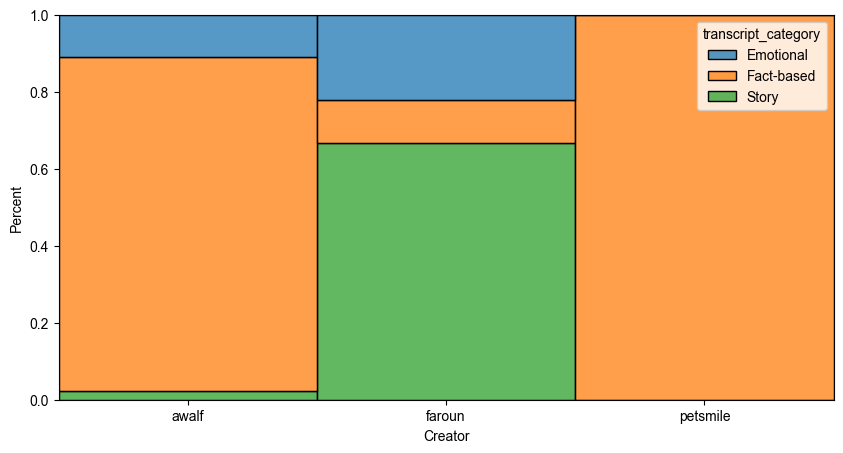

In [46]:
def creators_category_transcirpt_viral(data):
    plt.figure(figsize=(10,5))
    viral_data = data[data['is_viral'] == True]
    sns.histplot(data = viral_data , x='Creator' , hue='transcript_category' , multiple="fill" , stat='percent')
    plt.show()
creators_category_transcirpt_viral(all_data_labeled)

### Analysis: The Proportional Mix of Viral Content

The previous chart showed the raw count of viral videos. This chart goes a step further by showing the *percentage* of each creator's viral hits that fall into each category. It answers a crucial question: "What is the strategic makeup of a successful video for each channel?"

The results are incredibly revealing and provide the strongest evidence yet for our hypothesis.

**Key Findings:**
*   **Story and Emotional content are disproportionately successful.** For the top two channels, these categories make up a much larger percentage of their viral hits than their overall content production.
*   **Faroun's (My Channel's) success is almost entirely driven by Storytelling.**
*   **Awalf's viral portfolio is more diverse**, but still shows the power of emotional content.
*   **PetSmile's viral content is one-dimensional**, consisting solely of fact-based videos.

---

### Modeling (transcript category)
This step is for creating a model that can label transcript category without need of using `google ai vertext` for future new videos  

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = all_data_labeled['transcript_category']
x = all_data_labeled['transcript']




X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    
  
model = Pipeline([
    ("tfidf", TfidfVectorizer()), 
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
model.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [97]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Emotional       1.00      0.20      0.33        10
  Fact-based       0.93      1.00      0.97       140
       Story       1.00      0.33      0.50         3

    accuracy                           0.93       153
   macro avg       0.98      0.51      0.60       153
weighted avg       0.94      0.93      0.92       153



### Insights
The classification report confirms our hypothesis perfectly:

*   **Misleading Accuracy:** The overall accuracy is high (93%), but this is an illusion caused by the model correctly predicting the dominant "Fact-based" class.
*   **Failure on Minority Classes:** The key metrics are **recall** for "Emotional" (20%) and "Story" (33%). This means the model failed to identify 80% of the emotional videos and 67% of the story videos in the test set. Even with `class_weight='balanced'`, the model could not learn the patterns from the few examples it had.

**Conclusion from Modeling:**
This experiment successfully demonstrates that the **class imbalance is too severe** for a standard machine learning model to be effective. The poor recall proves that "Emotional" and "Story" content are linguistically different from "Fact-based" content, but we simply don't have enough data for the model to learn those differences.

**Solution** : we will use SMOTE (Synthetic Minority Over-sampling Technique) to hand class imblance and other models (xgBoost or RandomForest)

---

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)



In [104]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


model = ImbPipeline([
    ("tfidf", TfidfVectorizer()), 
    ("smote", SMOTE(random_state=42)),  
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
model.fit(X_train , y_train_enc)
preds_enc = model.predict(X_test)
preds = le.inverse_transform(preds_enc)
y_test_orig = le.inverse_transform(y_test_enc)
print(classification_report(y_test_orig, preds))


              precision    recall  f1-score   support

   Emotional       1.00      0.10      0.18        10
  Fact-based       0.93      1.00      0.96       140
       Story       1.00      0.33      0.50         3

    accuracy                           0.93       153
   macro avg       0.98      0.48      0.55       153
weighted avg       0.93      0.93      0.90       153



### Analysis of SMOTE Model Performance: A Step Forward, But Still Flawed

The results from the model with SMOTE show some changes, but ultimately highlight that the problem is more complex than just class imbalance.

**What Changed:**
*   **Precision remains high:** When the model *does* predict "Emotional" or "Story," it is almost always correct (100% precision).
*   **Recall is still very low:** The key metric, **recall**, saw almost no improvement. The model still only identifies **10% of emotional videos** and **33% of story videos**. This means it is still missing the vast majority of these important categories.

**Interpretation:**
Using SMOTE did not solve the core problem. This tells us two things:
1.  **The linguistic signal is weak:** The words and phrases used in "Emotional" and "Story" videos may not be distinct enough from "Fact-based" videos for a traditional TF-IDF model to easily differentiate them, even with a balanced dataset. The context and narrative flow matter more than just the presence of certain words.

In [102]:
from sklearn.ensemble import RandomForestClassifier



model = Pipeline([
        ("tfidf", TfidfVectorizer()), 
        ("clf", RandomForestClassifier(n_estimators=200 , class_weight="balanced" , random_state=42))
])

model.fit(X_train , y_train)
preds = model.predict(X_test)
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

   Emotional       0.00      0.00      0.00        10
  Fact-based       0.92      1.00      0.96       140
       Story       0.00      0.00      0.00         3

    accuracy                           0.92       153
   macro avg       0.31      0.33      0.32       153
weighted avg       0.84      0.92      0.87       153



c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\anasl\Desktop\Projetcs\Youtube-analysis-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 